## STATISTICS FOR DATA SCIENCE INDIVIDUAL ASSIGNMENT 1

## Question 1:

Create a Binomial distribution graph that includes the following repetitions and values of *p*

* repetitions = 10, 12, 30, 70, 50
* p = 0.1, 0.2, 0.5, 0.7, 0.99



In [24]:
path = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def factorial(n): 
  fact = n
  if n == 0:
    fact = 1
  else:
    for i in range(1, n):
      fact = fact * i
  return fact

CODE EXPLANATION: First, in order to create a Binomial distribution; we will need to import 3 important libraries that will allows us to execute this task efficiently. The libraries in this case that we will import are; pandas, numpy and mathplot. Then, we will write the code that defines a fucntion to cimpute the factorial of a number. The code we write here checks in the input is and resurns 1; otherwise, it multiplies the input by each number from 1 to n-1 and returns the result.

In [25]:
def Binomial(n_experiments, p):
  results = []

  for x in range(0,n_experiments+1):
    num_ = factorial(n_experiments)
    denominator = factorial(x)*factorial((n_experiments-x))
    combinations = num_/(denominator)
    P_x = combinations*(p**x)*((1-p)**(n_experiments-x))

    results.append([x, P_x])
    df = pd.concat([pd.DataFrame(results, columns=['x', 'P(x)'])])
  return df

CODE EXPLANATION: In the next step, we write a code that defines a function to compute the binomial distribution for a given of number expreiments and probability. This code will calculate the probability for each possible outcome, stores the results and returns a dataframe with these probabilities.

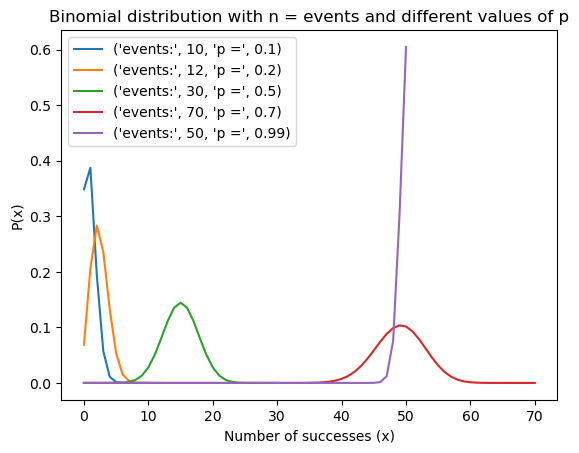

In [26]:
rep = [10,12,30,70,50]
proba = [0.1, 0.2, 0.5, 0.7, 0.99]

for i in range(0,len(rep)):
  df = Binomial(rep[i],proba[i])
  plt.plot(df['x'], df['P(x)'], label=('events:',rep[i],'p =',proba[i]))

plt.xlabel('Number of successes (x)') # Add labels and title
plt.ylabel('P(x)')
plt.title('Binomial distribution with n = events and different values of p')
plt.legend()
plt.show()

CODE EXPLANATION: Finally, according to the exercise; we need to create a binomial distribution given the repetitions and probabilities. For that, we wrote a code that will iterate through predefined lists of experiments and probabilities and computes the binomial distribution for each pair. After that, it plots the results, labels the axes, adds a title, and displays the plot with a legend for each combination of experiments and probabilities.

ANALYSIS: On the x axis we can see the number of successes in the trials, the y axis represents the probabilities of achieving 'x' successes, and the different curves correspond to different values of number of repetions ranging from 10-70. 

As we can see in the graph, smaller 'n' and 'p' values result in a left-skewed distribution with a lower probabilities of successes. However, as 'n' increases, the distributions spread out and shift towards higher successes. Another interesting observation is that with an increase in 'p' the distribution spikes near the maximum posibble successes. 

Overall, the graph shows us how binomial distributions change with varying number of repetitions and probabilities of scuccess. It highlights the impact of these variables on the likelihood of successes.

## Question 2:
Create a Poison distribution graph that includes the following number of events and values of *lambda*

* lambda = 1.5, 5, 10, 40
* events = 10, 30, 30, 60


In [27]:
import math
def Poisson(lambda_, n_events):
  results = []

  for x in range(0,n_events+1):
    num_ = (math.exp(-lambda_))*(lambda_**x)
    denominator = factorial(x)
    P_x = num_/denominator
    results.append([x, P_x])
    df = pd.concat([pd.DataFrame(results, columns=['x', 'P(x)'])])
  return df

CODE EXPLANATION: Firstly, we will write a code that defines a fucntion 'Poisson(lambda_, n_events)' to compute the Poisson distribution for a given lambda and number of events. Then, it iterates through the event range, calculates the Poisson probability for each event, and appends the results to a list. This list is then converted into a pandas dataframe for easy analysis.

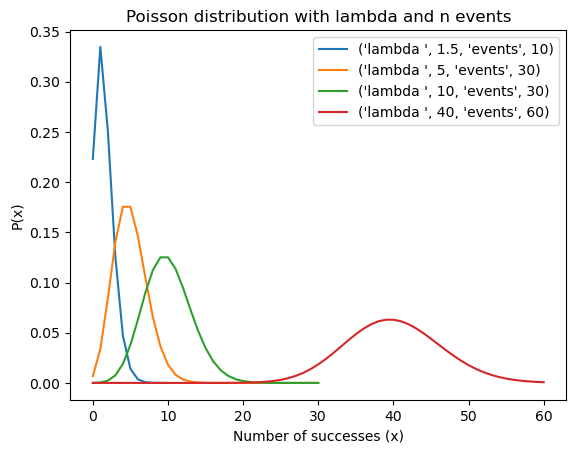

In [28]:
lambda_ = [1.5, 5, 10, 40]
n_events = [10, 30, 30, 60]

for i in range(0, len(lambda_)):
  df = Poisson(lambda_[i], n_events[i])
  plt.plot(df['x'], df['P(x)'], label=('lambda ',lambda_[i],'events',n_events[i]))

plt.xlabel('Number of successes (x)') # Add labels and title
plt.ylabel('P(x)')
plt.title('Poisson distribution with lambda and n events')
plt.legend()
plt.show()

CODE EXPLANATION: In the next step, we intend to create a ditribution by iterating over different values of lambda and the corresponding number of events. For this we wrote a code which iterates over these pairs thereby generating Posisson distribution data for each pair. Then we plot these distributions on a graph, labeling each plot with it's lambda and event count.

ANALYSIS: As we can see from the graph, as lambda increases, the peak of the poisson distribution moves to the right, reflecting a higher expected number of successes. Also, the distribution becomes much wider with increasing lambda, indicating a higher variability in the number of successes. Finally, the sharpness of the peak decreases with increasing lambda, showing that a higher lambda value results in more spread-out probabilities.

## Question 3
From the GDP file, obtain the following values: count, mean, std, min, 25%, 50%, 75%, min and max values of the countries in 2019 and 2020

In [29]:
df = pd.read_csv(path+'GDP_DATA.csv', header=2) 

def remove_commas(x):
    return x.replace(',', '') if isinstance(x, str) else x

df = df.drop(columns=['Indicator Name', 'Indicator Code'])
df = df.applymap(remove_commas) 
df = df.apply(pd.to_numeric, downcast='integer', errors='ignore') 

exclude = ['AFE', 'WLD','SAS','HIC','OED','PST','IBT','LMY','MIC','IBD','EAS','UMC','LTE','ECS','NAC','EAP','TEA','EUU','EMU','EAR','LMC','LCN','TLA','LAC','TEC','TSA','MEA','ECA','ARB','IDA','SSF','TSS','SSA','CEB','FCS','MNA','IDX','TMN','PRE','LDC','IDB','HPC','AFW','SST','LIC','OSS','CSS']
df = df[~df['Country Code'].isin(exclude)] 

year = '2019'
print(df[[year]].dropna().describe())

year = '2020'
print(df[[year]].dropna().describe())

               2019
count  2.080000e+02
mean   4.167491e+11
std    1.865060e+12
min    5.422315e+07
25%    6.464318e+09
50%    2.632751e+10
75%    1.875364e+11
max    2.137257e+13
               2020
count  2.040000e+02
mean   4.109396e+11
std    1.864234e+12
min    5.505471e+07
25%    6.865301e+09
50%    2.513910e+10
75%    1.854861e+11
max    2.089374e+13


/var/folders/lm/mmvf2q1d0ybdnjwty7lf0x_w0000gn/T/ipykernel_20170/107000582.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(remove_commas)


CODE EXPLANATION: For this question we will execute a code that reads and cleans the GDP data by removing commas and unnecessary columns. After that, it converts values to numeric values, and filters out specified country codes. Finally it prints the stats for year 2019 and 2020 that we need.

ANALYSIS: 
1. Mean GDP: The mean GDP slightly decreased from $416.75 billion in 2019 to $410.94 billion in 2020, indicating a general decline in average GDP.
2. Median GDP: The median GDP decreased from $26.33 billion in 2019 to $25.14 billion in 2020, reflecting a reduction in the central tendency of GDP values.
3. Minimum GDP: The minimum GDP value saw a small increase from $54.22 million in 2019 to $55.05 million in 2020, showing a slight improvement at the lower end of the GDP spectrum.
4. Maximum GDP: The maximum GDP decreased from $21.37 trillion in 2019 to $20.89 trillion in 2020, indicating a reduction in the highest GDP value.
5. Standard Deviation: The standard deviation remained almost the same, around $1.86 trillion for both years, suggesting consistent variability in GDP values across countries.
6. 25th Percentile: The 25th percentile increased slightly from $6.46 billion in 2019 to $6.87 billion in 2020.
7. 75th Percentile: The 75th percentile decreased from $187.54 billion in 2019 to $185.49 billion in 2020, indicating a shift in GDP distribution with a slight contraction at the higher end.

## Question 4

From the Bayes' Theorem example, calculate the rest of the probabilities of the diseases X, Y and Z:
* Probability of having the disease given that A is present
* Probability of having the disease given that B is present after confirming the presence of A
* Probability of having the disease given that B is not present and after confirming the presence of A

* Probability of having the disease given that A is not present
* Probability of having the disease given that B is present after confirming that A is not present
* Probability of having the disease given that B is not present and after rejecting the presence of A


### 1

In [30]:
P_X = 0.6
P_Y = 0.3
P_Z = 0.1

P_AX = 0.2
P_BX = 0.2
P_AY = 0.9
P_BY = 0.2
P_AZ = 0.2
P_BZ = 0.9

P_A = P_AX * P_X + P_AY * P_Y + P_AZ * P_Z

P_XA = (P_AX * P_X) / P_A
print ('The probability of having the disease X given that A is present is ', round(P_XA,2))

P_YA = (P_AY * P_Y) / P_A
print('The probability of having the disease Y given that A is present is ', round(P_YA,2))

P_ZA = P_AZ * P_Z / P_A
print ('The probability of having the disease Z given that A is present is ', round(P_ZA,2))


The probability of having the disease X given that A is present is  0.29
The probability of having the disease Y given that A is present is  0.66
The probability of having the disease Z given that A is present is  0.05


### 2

In [31]:
P_X = 0.29
P_Y = 0.66
P_Z = 0.05

P_AX = 0.2
P_BX = 0.2
P_AY = 0.9
P_BY = 0.2
P_AZ = 0.2
P_BZ = 0.9

P_B = P_BX * P_X + P_BY * P_Y + P_BZ * P_Z

P_XB = (P_BX * P_X) / P_B
print ('The probability of having the disease Z given that B is present afterconfirming A is ', round(P_XB,2))

P_YB = (P_BY * P_Y) / P_B
print ('The probability of having the disease Z given that B is present afterconfirming A is ', round(P_YB,2))

P_ZB = P_BZ * P_Z / P_B
print ('The probability of having the disease Z given that B is present afterconfirming A is ', round(P_ZB,2))


The probability of having the disease Z given that B is present afterconfirming A is  0.25
The probability of having the disease Z given that B is present afterconfirming A is  0.56
The probability of having the disease Z given that B is present afterconfirming A is  0.19


### 3

In [32]:
P_X = 0.29
P_Y = 0.66
P_Z = 0.05

P_AX = 0.2
P_BX = 0.2
P_AY = 0.9
P_BY = 0.2
P_AZ = 0.2
P_BZ = 0.9
P_NBX = 0.8
P_NBY = 0.8
P_NBZ = 0.1

P_B = P_BX * P_X + P_BY * P_Y + P_BZ * P_Z

P_NB = 1 - P_B

P_XNB = (P_NBX * P_X) / P_NB
print ('The probability of having the disease Z given that B is not present afterconfirming A is ', round(P_XNB,2))

P_YNB = (P_NBY * P_Y) / P_NB
print ('The probability of having the disease Z given that B is not present afterconfirming A is ', round(P_YNB,2))

P_ZNB = (P_NBZ * P_Z) / P_NB
print ('The probability of having the disease Z given that B is not present afterconfirming A is ', round(P_ZNB,2))

The probability of having the disease Z given that B is not present afterconfirming A is  0.3
The probability of having the disease Z given that B is not present afterconfirming A is  0.69
The probability of having the disease Z given that B is not present afterconfirming A is  0.01


### 4

In [33]:
P_X = 0.6
P_Y = 0.3
P_Z = 0.1

P_AX = 0.2
P_BX = 0.2
P_AY = 0.9
P_BY = 0.2
P_AZ = 0.2
P_BZ = 0.9
P_NAX = 0.8
P_NAY = 0.1
P_NAZ = 0.8

P_A = P_AX * P_X + P_AY * P_Y + P_AZ * P_Z

P_NA = 1 - P_A

P_XNA = (P_NAX * P_X) / P_NA
print ('The probability of having the disease X given that A is not present is ', round(P_XNA,2))

P_YNA = (P_NAY * P_Y) / P_NA
print('The probability of having the disease Y given that A is not present is ', round(P_YNA,2))

P_ZNA = P_NAZ * P_Z / P_NA
print ('The probability of having the disease Z given that A is not present is ', round(P_ZNA,2))

The probability of having the disease X given that A is not present is  0.81
The probability of having the disease Y given that A is not present is  0.05
The probability of having the disease Z given that A is not present is  0.14


### 5

In [34]:
P_X = 0.81
P_Y = 0.05
P_Z = 0.14

P_AX = 0.2
P_BX = 0.2
P_AY = 0.9
P_BY = 0.2
P_AZ = 0.2
P_BZ = 0.9
P_NAX = 0.8
P_NAY = 0.1
P_NAZ = 0.8
P_NBX = 0.8
P_NBY = 0.8
P_NBZ = 0.1

P_B = P_BX * P_X + P_BY * P_Y + P_BZ * P_Z

P_XB = (P_BX * P_X) / P_B
print ('The probability of having the disease X given that B is present after rejecting A is ', round(P_XB,2))

P_YB = (P_BY * P_Y) / P_B
print ('The probability of having the disease Y given that B is present after rejecting A is ', round(P_YB,2))

P_ZB = P_BZ * P_Z / P_B
print ('The probability of having the disease Z given that B is present after rejecting A is ', round(P_ZB,2))

The probability of having the disease X given that B is present after rejecting A is  0.54
The probability of having the disease Y given that B is present after rejecting A is  0.03
The probability of having the disease Z given that B is present after rejecting A is  0.42


### 6

In [35]:
P_X = 0.81
P_Y = 0.05
P_Z = 0.14

P_AX = 0.2
P_BX = 0.2
P_AY = 0.9
P_BY = 0.2
P_AZ = 0.2
P_BZ = 0.9
P_NAX = 0.8
P_NAY = 0.1
P_NAZ = 0.8
P_NBX = 0.8
P_NBY = 0.8
P_NBZ = 0.1

P_NB = P_NBX * P_X + P_NBY * P_Y + P_NBZ * P_Z

P_XNB = (P_NBX * P_X) / P_NB
print ('The probability of having the disease X given that B is not present after rejecting A is ', round(P_XNB,2))

P_YNB = (P_NBY * P_Y) / P_NB
print ('The probability of having the disease Y given that B is not present after rejecting A is ', round(P_YNB,2))

P_ZNB = P_NBZ * P_Z / P_NB
print ('The probability of having the disease Z given that B is not present after rejecting A is ', round(P_ZNB,2))

The probability of having the disease X given that B is not present after rejecting A is  0.92
The probability of having the disease Y given that B is not present after rejecting A is  0.06
The probability of having the disease Z given that B is not present after rejecting A is  0.02


## Question 5

If you want to try this exercise using excel, watch the following video: https://youtu.be/EsIuWugH7mM?si=Gay5hpP1QzTngRyW

Assume that the population follows a normal distribution in terms of annual income of with an average of 25000 USD and a standard deviation of 5000 USD. Create a graph and locate the following percentiles:
* Above 50%
* Above 75%
* Above 90%
* Top 5%
* Top 1%

In the first step, we will import the necessary libraries needed to solve this question and define the parameters we need.

In [36]:
import scipy.stats as st 
import numpy as np
import matplotlib.pyplot as plt

mean = 25000
sd = 5000

Now, we need to create a distribution that follows the normal curve.

For example, we are going to use the method norm to get the value in which we can cut in half the population. For this, we need to call the st.norm function and add our mean and sd as arguments:

st.norm(25000, 5000)

and to know which is the value in which we can cut this population in half, we will call the ppf function, ppf means percent point function.

In [37]:
st.norm(mean, sd).ppf(.5)

25000.0

Now, try to see where do the top 90% of the population falls in terms of anual income:

In [38]:
st.norm(mean, sd).ppf(.9)

31407.757827723002

This means that people earning 31407 or more, are in the top 10% (or above 90% of our population following a normal dristrbution).

If we want to round this, use the following function:

In [39]:
round(st.norm(mean, sd).ppf(.9),1)

31407.8

In [40]:
# define the normal distribution and Probability Density Function (PDF)
dist = st.norm(loc=mean, scale=sd) # Create an object with the distribution parameters
x = np.linspace(dist.ppf(.0001), dist.ppf(.99999)) # Create our x values
y = dist.pdf(x) # Create our y values

# calculate PPFs
ppfs = {} # Create an empty dictionary
for ppf in [.50, .75, .90, .95, .99]:
    p = dist.ppf(ppf)
    ppfs.update({ppf*100: p}) # Save the vale of the number and the percentile in the same dictionary

ppfs # to see our dictionary with the percentiles and the numeric values

{50.0: 25000.0,
 75.0: 28372.44875098041,
 90.0: 31407.757827723002,
 95.0: 33224.26813475736,
 99.0: 36631.7393702042}

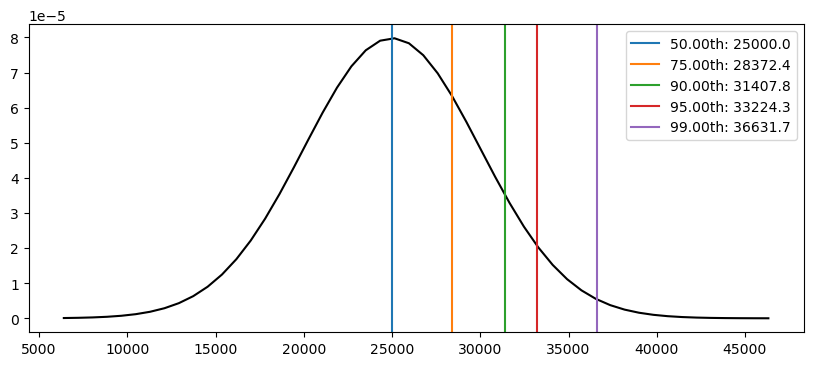

In [41]:
# plot results
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, color='k')
for i, ppf in enumerate(ppfs):
    ax.axvline(ppfs[ppf], color=f'C{i}', label=f'{ppf:.2f}th: {ppfs[ppf]:.1f}') # To add the legend by using the saved dictionary
ax.legend()
plt.show()

The graph above shows us a normal distribution of annual income with a mean of $25,000 and a standard deviation of $5,000. The vertical lines plotted on the graph represent various percentiles, highlighting specific points in the income ditribution.

ANALYSIS OF THE OUTPUT:

1. The mean income, represented by the blue line, is at $25,000. This is the point at which 50% of the population earns less than $25,000 and 50% earns more than $25,000.
2. The orange line is at approximately $28,000 and represents the 75th percentile. This indicates that 75% of the population earns less than this amount, while 25% earns more.
3. The green line is at approximately $32,000 and represents the 90th percentile. This shows that 90% of the population earns less than this amount, while 10% earns more.
4. The red line is at approximately $33,500 and represents the top 5% of earners. This means that 95% of the population earns less than this amount, while the top 5% earns more.
5. The purple line is at approximately $37,000 and represents the top 1% of earners. This indicates that 99% of the population earns less than this amount, while the top 1% earns more.

INTERPRETATION:
We can see that majority of the population has thier income clustered around $25,000. As we move to higher percentiles, the income value increaes, indicating the higher earnings of smaller population segments.

